# **Applied Machine Learning Assignment – 2**

# **Proposing solutions to real world business problems**

# **Name of Student: SAFINA KHANUM**                  
# **SAP ID: 80206190004**

# **Caselet 2: Analysing reviews of ceiling fans**




# **Question 1 : State Business issue & how Machine Learning can help.**

**Business Issue :** To analyze the available data about reviews and ratings of ceiling fans and derive some meaningful insights out of it such that some data driven strategies could be developed that would help in increasing the sales of ceiling fans through the e-commerce website. 
The key variable of interest in the data set - 'Review_Text' is unstructured in nature but also on such variable that can give specific insights about the customer experience while shopping through this e-commerce website. It is not a company recorded column such as sales but it is one column where the customers have directly given their inputs/feedback about their shopping experience.Analyzing other kind of data such as sales can give us insights like 'sales have decreased since the past year' but analyzing reviews and its relationship with other variables can help us arrive at insings such us 'why have the sales decreased since the past year?' or 'What is making the customers unhappy?' Hence it is important to analyze such unstructured data.

**How Machine Learning can help :** An entire machine learning pipe line can be built using this data set. The data set can be explored through graphs and tables (after cleaning it) to understand the current state of customers and understand customer behaviour.Some examples could be -'how satisfied are the customers with the price at which the ceiling fans are being offered.','What specific areas are the customers facing issues with?' etc. Then a sentiment analysis can be carried out to understand the overall sentiment of the customers. Understanding cutomer sentiments and constantly monitoring them can further help the e-commerce site figure out which area they are doing well and which area needs improvement.Once the areas that need improvement are identified, corrective measures can be taken in time to improve customer satisfaction and build a good brand image. 

# **Question 2 : Discuss your approach? Give specific steps?**

My approach involves,
* **Exploring the raw data set**
* **Cleaning/Pre-processing the raw data set**
* **Using the cleaned/pre-processed data set to derive inferences about customers using plots and tables**
* **Suggesting some ideas based on the gathered inferences**
* **Building a sentiment analysis model**

**The detailed substeps for all the above steps are given below with their respective codes, outputs and inferences**


# **Question 3 : Discuss feature engineering for this case & explain steps.**

Feature engineering for the raw data set involves,

* Converting the 'Review_Creation_Date' variable from object to date data type
* Replacing the missing values under the 'Brand' variable with 'Brand not mentioned'
* Creating a new column review type by mapping the ratings to words like 'Very good', 'good', 'neutral', 'bad', 'very bad'.
* Creating a new column review length - the number of words in each review.
* Separating the year and month from 'Review_Creation_Date' by creating separate columns for them

Feature engineering for sentiment analysis involves,

* Converting all reviews to lower case
* Removing extra white space from reviews
* Removing punctuations, symbols and numbers from the reviews
* Removing stopwords from the reviews
* Tokenization - dividing the text string into individual words
* Lemmatization - fetching the root word of each token

**The codes and outputs for all the above mentioned steps are given below.**



# **Question 4 : What algorithm(s) do you recommend & why?**

I would recommend a sentiment analysis since the key variable of interest is unstructured (text data) in nature and we also have the ratings available that can be mapped to arrive at 'positive', 'negative' and 'neutral' sentiments. A predictive model, to predict the customer sentiments can be built using the existing data set to understand the current sentiments of customers and the same model can be further used to predict sentiments for the new reviews as and when they come in. This way the sentiments of customers can be constantly monitored and this can be used to identify and correct any specific issues that the customers are facing which ultimately enhances the customers experience and hence helps in driving more sales.

I have used the multinomial Naive Bayes algorithm for the given data set since Naive bayes is one of the most commonly used algorithm for text classification. It is simple to use and yet effective. It is quick and works well for multiclass classification problems like the given case.

**The code and output for sentiment analysis is given below.**

# **Importing all the required libraries**

In [65]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords #to remove stopwords
import nltk #for tokenization
from nltk.corpus import wordnet #for lemmatization
from nltk.stem import WordNetLemmatizer  #for lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer #For feature extraction
from sklearn.model_selection import train_test_split #for splitting the data into train and test
from sklearn.naive_bayes import MultinomialNB #For buiding the Multinomial Naive Bayes model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #To calculate model performance metrics

In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from datetime import date
import datetime

## **Exploring the raw data set** 

In [6]:
# Importing the data set

reviews=pd.read_csv("CeilingFanReviews.csv",encoding="cp1252")

In [7]:
# Checking the data dimension

reviews.shape

(1188, 14)

**The data set contains 1188 observations and 14 variables**



In [8]:
# Viewing the data set

reviews.head()

,Rev_id,Retailer,Division,Category,Department,Product_URL,Brand,Product_Name,Final_Price_after_Discount,Review_Link,Review_Header,Review_Creation_Date,Review_Rating_Score,Review_Text
0,1,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,Excellent fan for an excellent price ...,24-Apr-18,5,Excellent fan for an excellent price
1,2,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,I put these fans in my spec houses and everyon...,15-Oct-19,5,I put these fans in my spec houses and everyon...
2,3,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,5 Star Review,03-Jul-19,5,Rating provided by a verified purchaser
3,4,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,"Easy to put together, our 3rd purchase for th...",17-Jan-19,5,"Easy to put together, our 3rd purchase for th..."
4,5,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,This fan it was easily to install and it is...,09-Feb-19,5,This fan it was easily to install and it is a ...


In [9]:
# Variable names in the data set

reviews.columns.values

array(['Rev_id', 'Retailer', 'Division', 'Category', 'Department',
       'Product_URL', 'Brand', 'Product_Name',
       'Final_Price_after_Discount', 'Review_Link', 'Review_Header',
       'Review_Creation_Date', 'Review_Rating_Score', 'Review_Text'],
      dtype=object)

In [10]:
# Data types of each variable in the data set

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rev_id                      1188 non-null   int64  
 1   Retailer                    1188 non-null   object 
 2   Division                    1188 non-null   object 
 3   Category                    1188 non-null   object 
 4   Department                  1188 non-null   object 
 5   Product_URL                 1188 non-null   object 
 6   Brand                       1068 non-null   object 
 7   Product_Name                1188 non-null   object 
 8   Final_Price_after_Discount  1188 non-null   float64
 9   Review_Link                 1188 non-null   object 
 10  Review_Header               1162 non-null   object 
 11  Review_Creation_Date        1188 non-null   object 
 12  Review_Rating_Score         1188 non-null   int64  
 13  Review_Text                 1188 

**There are 11 categorical variables and 3 numerical variables in the data set.**

Variable Description:

* Rev_id : It is a unique id assigned to each review
* Retailer : Name of the retailer from where the ceiling fan has been purchased.
* Division : The division to which the purchased ceiling fan belongs
* Category : The category to which the purchased ceiling fan belongs
* Department : The department to which the purchased ceiling fan belongs
* Product_URL : The URL of the purchased ceiling fan from the website where it has been purchased
* Brand : Brand name to which the purchased ceiling fan belongs
* Product_Name : Name of the ceiling fan
* Final_Price_after_Discount : The final price at which the ceiling fan was sold after discount
* Review_Link : Link of the review on the company website
* Review_Header : The first few words of the review that give an idea of what the review is talking about
* Review_Creation_Date : Date when the review was written
* Review_Rating_Score : Rating given to the purchased ceiling fan from 1-5
*Review_Text : The entire review

In [11]:
# Checking for missing values in the data set

reviews.isnull().sum()

Rev_id                          0
Retailer                        0
Division                        0
Category                        0
Department                      0
Product_URL                     0
Brand                         120
Product_Name                    0
Final_Price_after_Discount      0
Review_Link                     0
Review_Header                  26
Review_Creation_Date            0
Review_Rating_Score             0
Review_Text                     0
dtype: int64

The above output shows the number of missing values under each column.

**There are 120 (10%) missing values under the 'Brand' variable and 26 (2%) missing values under the 'Review_Header' variable.**

**Both variables have <30% of missing values and hence both variables can be retained and need not be eliminated.**

In [12]:
# Checking for duplicate observations in the data set based on Review id

duplicates=reviews[reviews.duplicated('Rev_id')] 
duplicates

,Rev_id,Retailer,Division,Category,Department,Product_URL,Brand,Product_Name,Final_Price_after_Discount,Review_Link,Review_Header,Review_Creation_Date,Review_Rating_Score,Review_Text



**The empty data frame in the above output shows that there are no duplicate observations in the data set.**

# **Cleaning/Pre-processing the raw data set.**

In [13]:
# Converting the 'Review_Creation_Date' variable from object to date data type

reviews['Review_Creation_Date'] = pd.to_datetime(reviews['Review_Creation_Date'])
reviews.head()

,Rev_id,Retailer,Division,Category,Department,Product_URL,Brand,Product_Name,Final_Price_after_Discount,Review_Link,Review_Header,Review_Creation_Date,Review_Rating_Score,Review_Text
0,1,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,Excellent fan for an excellent price ...,2018-04-24,5,Excellent fan for an excellent price
1,2,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,I put these fans in my spec houses and everyon...,2019-10-15,5,I put these fans in my spec houses and everyon...
2,3,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,5 Star Review,2019-07-03,5,Rating provided by a verified purchaser
3,4,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,"Easy to put together, our 3rd purchase for th...",2019-01-17,5,"Easy to put together, our 3rd purchase for th..."
4,5,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,This fan it was easily to install and it is...,2019-02-09,5,This fan it was easily to install and it is a ...


In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Rev_id                      1188 non-null   int64         
 1   Retailer                    1188 non-null   object        
 2   Division                    1188 non-null   object        
 3   Category                    1188 non-null   object        
 4   Department                  1188 non-null   object        
 5   Product_URL                 1188 non-null   object        
 6   Brand                       1068 non-null   object        
 7   Product_Name                1188 non-null   object        
 8   Final_Price_after_Discount  1188 non-null   float64       
 9   Review_Link                 1188 non-null   object        
 10  Review_Header               1162 non-null   object        
 11  Review_Creation_Date        1188 non-null   datetime64[n



**Missing value Treatment**

The variable 'Review header' is similar to review text except that it has a shorter version of each review. So the 'Review_text' variable can be used in place of 'Review header' wherever required which resolves the problem of missing values under this variable.

The 120 missing values under the 'Brand' variable can be replaced with 'Brand not mentioned'.






In [15]:
# Replacing the missing values under the 'Brand' variable with 'Brand not mentioned'

reviews['Brand'].fillna("Brand not mentioned",inplace=True)
reviews['Brand'].value_counts()

Harbor Breeze                   378
Home Decorators Collection      286
Fanimation Studio Collection    149
Hunter                          123
Brand not mentioned             120
Hampton Bay                     104
Kichler                          28
Name: Brand, dtype: int64

In [16]:
# Rechecking for missing values in the data set

reviews.isnull().sum()

Rev_id                         0
Retailer                       0
Division                       0
Category                       0
Department                     0
Product_URL                    0
Brand                          0
Product_Name                   0
Final_Price_after_Discount     0
Review_Link                    0
Review_Header                 26
Review_Creation_Date           0
Review_Rating_Score            0
Review_Text                    0
dtype: int64

All missing values under the 'Brand' column have been replaced.

# **Using the cleaned/pre-processed data set to derive inferences about customers using plots and tables.**

**Columnwise descriptive statistics**

In [17]:
# Columnwise descriptive statistics from the data set

reviews.describe(include='all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,Rev_id,Retailer,Division,Category,Department,Product_URL,Brand,Product_Name,Final_Price_after_Discount,Review_Link,Review_Header,Review_Creation_Date,Review_Rating_Score,Review_Text
count,1188.000000,1188,1188,1188,1188,1188,1188,1188,1188.000000,1188,1162,1188,1188.000000,1188
unique,NaN,2,2,2,3,80,7,79,NaN,793,1014,493,NaN,1120
top,NaN,Homedepot,Lighting & Ceiling Fans,Ceiling Fans & Accessories,Ceiling Fans,https://www.homedepot.com/p/Hugger-52-in-LED-I...,Harbor Breeze,Hugger 52 in. LED Indoor Brushed Nickel Ceilin...,NaN,https://www.homedepot.com/ReviewServices/revie...,5 Star Review,2018-12-18 00:00:00,NaN,Rating provided by a verified purchaser
freq,NaN,594,594,594,594,76,378,76,NaN,29,34,11,NaN,51
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-01 00:00:00,NaN,NaN
mean,594.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.142315,NaN,NaN,NaN,4.251684,NaN
std,343.090367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.972227,NaN,NaN,NaN,1.252377,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.970000,NaN,NaN,NaN,1.000000,NaN
25%,297.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.980000,NaN,NaN,NaN,4.000000,NaN


From the output of the descriptive statistics of the data set,

* There are 2 unique Retailers
* 2 unique product divisions
* 2 unique product categories
* 3 unique product departments
* 80 unique product URLs
* 7 unique brands
* 79 unique products
* 634 unique dates when reviews have been written
* Most number of purchases are from Ceiling fans department
* Most number of purchases are from the Harbor Breeze brand
* Most purchased product is the Hugger 52 in. LED Indoor Brushed Nickel Ceiling fan
* Most reviews have been written on 18th Dec 2018
* The price range of ceiling fans is between 30 dollars to 300 dollars. The average price of a ceiling fan is 126 dollars.
* The average rating in the dataset is 4


**Exploring different variables in the dataset through plots and tables**

In [18]:
# Number of reviews by Retailer

reviews['Retailer'].value_counts()

Homedepot    594
Lowes        594
Name: Retailer, dtype: int64

**There are 2 retailers in the data set, Home depot and Lowes and there are equal number of reviews both retailers.**

In [19]:
# Number of reviews by Division

reviews['Division'].value_counts()

Lighting & Ceiling Fans    594
Lighting                   594
Name: Division, dtype: int64

**There are 2 divisions in the data set, Lighting and Ceiling Fans and Lighting and there are equal number of reviews or purchases from both divisions.**

In [20]:
# Number of reviews by Product category

reviews['Category'].value_counts()

Ceiling Fans & Accessories    594
Ceiling Fans                  594
Name: Category, dtype: int64

**There are 2 product categories in the data set, Ceiling fans and accessories and ceiling fans and there are equal number of reviews or purchases from both categories.**




In [21]:
# Number of reviews by Department

reviews['Department'].value_counts()

Ceiling Fans                   594
Ceiling Fans With Lights       581
Ceiling Fans Without Lights     13
Name: Department, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


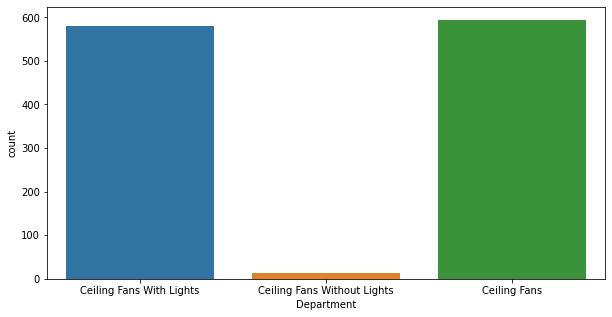

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(reviews['Department'])

**The most popular kind of products are Ceiling fans with 594 reviews/purchases, followed by Ceiling fans with lights with 581 reviews/purchases and the least popular kind are Ceiling fans without lights with only 13 reviews/purchases.**

In [23]:
# Number of reviews by Brand

reviews['Brand'].value_counts()

Harbor Breeze                   378
Home Decorators Collection      286
Fanimation Studio Collection    149
Hunter                          123
Brand not mentioned             120
Hampton Bay                     104
Kichler                          28
Name: Brand, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


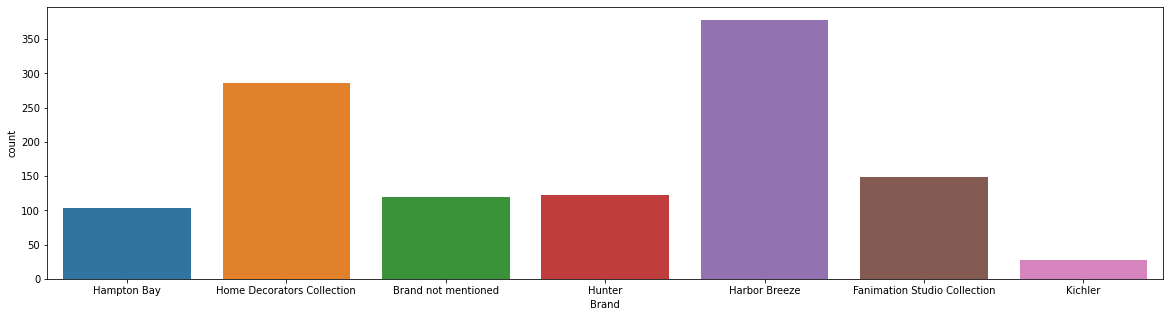

In [24]:
plt.figure(figsize=(20, 5))
sns.countplot(reviews['Brand'])

**The above outputs show the brands by the number of reviews/purchases made. There are 6 brands out of which Harbor Breeze is the most popular brand and Kichler is the least popular brand by number of reviews/purchases.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


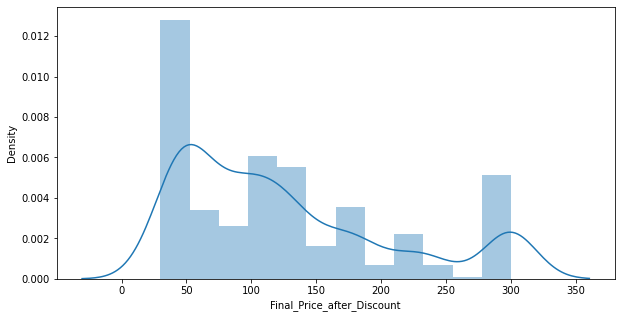

In [25]:
# Distribution of price

plt.figure(figsize=(10, 5))
sns.distplot(reviews["Final_Price_after_Discount"],hist=True)

**From the above plot it can be said that fans are priced between 30 - 300 dollars and most fans in the data set cost less than 200 dollars which means that most customers purchase ceiling fans that cost less than 200 dollars.The highest number of purchases are of ceiling fans that cost between 30 - 50 dollars.Hence it can be said that customers are price sensitive.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


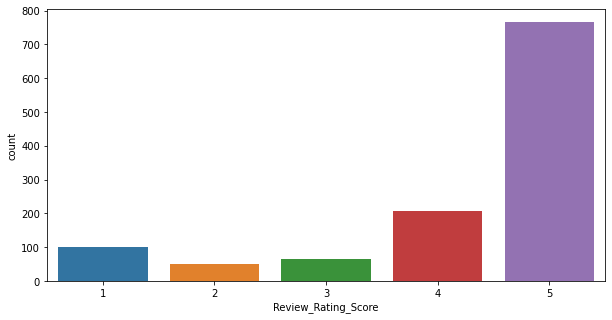

In [26]:
# Number of reviews under each rating

plt.figure(figsize=(10, 5))
sns.countplot(reviews['Review_Rating_Score'])

**Most number of ratings are of 5 or 4 which shows that most customers are satisfied with the products that they have purchased.**

In [27]:
# Average rating by retailer

reviews.groupby('Retailer')['Review_Rating_Score'].agg(['mean','count']).sort_values(by='mean',ascending=False)

,mean,count
Retailer,,
Lowes,4.257576,594
Homedepot,4.245791,594


**Both the retailers have a good average rating.The average rating for both retailers is almost the same and hence it can be said that there is no significant difference in customer satisfaction between the two retailers.**

In [28]:
# Average rating by Brand

reviews.groupby('Brand')['Review_Rating_Score'].agg(['mean','count']).sort_values(by='mean',ascending=False)

,mean,count
Brand,,
Hampton Bay,4.490385,104
Hunter,4.333333,123
Harbor Breeze,4.264550,378
Home Decorators Collection,4.237762,286
Fanimation Studio Collection,4.181208,149
Brand not mentioned,4.125000,120
Kichler,3.892857,28


**Hampton Bay is the brand with the highest average rating and Kichler is the brand with the lowest average rating.**

**Kichler is also the brand with the least number of reviews when compared to all other brands.**

In [29]:
# Which is the product with the highest average rating?

reviews.groupby('Product_Name')['Review_Rating_Score'].agg(['mean','count']).sort_values(by='mean',ascending=False)[:1]

,mean,count
Product_Name,,
Shanahan 52 in. LED Indoor/Outdoor Bronze Ceiling Fan with Light Kit,5.0,3


**Though the product listed in the above output has the highest average rating, it has been purchased by only 3 customers. A buyer would rather rely on a product that has been highly rated and has been purchased by many customers as well instead of relying on a product that has only been highly rated but purchased by very few customers.**

In [30]:
# Sorting by 'count' or number of reviews instead to arrive at the most reviewed product

reviews.groupby('Product_Name')['Review_Rating_Score'].agg(['mean','count']).sort_values(by='count',ascending=False)[:1]

,mean,count
Product_Name,,
Hugger 52 in. LED Indoor Brushed Nickel Ceiling Fan with Light Kit,4.092105,76


**'Hugger 52 in. LED Indoor Brushed Nickel Ceiling Fan with Light Kit' is the most reviewed product with 76 reviews and a highly rated product as well with an average rating of 4.1.**

**Products with a good/high rating generally have good reviews and products with a low rating have bad reviews. Hence based on the rating a new column 'review type' can be created which will have values,**

* **Very good for a rating of 5**
* **Good for a rating of 4**
* **Neutral for a rating of 3**
* **Bad for a rating of 2**
* **Very bad for a rating of 1**

In [31]:
# Creating a new column review type

reviews['review_type'] = reviews['Review_Rating_Score'].map({1:'Very Bad', 2:'Bad',3:'neutral',4:'Good',5:'Very good'}) 
reviews.head()

,Rev_id,Retailer,Division,Category,Department,Product_URL,Brand,Product_Name,Final_Price_after_Discount,Review_Link,Review_Header,Review_Creation_Date,Review_Rating_Score,Review_Text,review_type
0,1,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,Excellent fan for an excellent price ...,2018-04-24,5,Excellent fan for an excellent price,Very good
1,2,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,I put these fans in my spec houses and everyon...,2019-10-15,5,I put these fans in my spec houses and everyon...,Very good
2,3,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,5 Star Review,2019-07-03,5,Rating provided by a verified purchaser,Very good
3,4,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,"Easy to put together, our 3rd purchase for th...",2019-01-17,5,"Easy to put together, our 3rd purchase for th...",Very good
4,5,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,This fan it was easily to install and it is...,2019-02-09,5,This fan it was easily to install and it is a ...,Very good


In [32]:
# Creating a new column - review length

reviews['review_length']=reviews['Review_Text'].apply(len)
reviews.head()

,Rev_id,Retailer,Division,Category,Department,Product_URL,Brand,Product_Name,Final_Price_after_Discount,Review_Link,Review_Header,Review_Creation_Date,Review_Rating_Score,Review_Text,review_type,review_length
0,1,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,Excellent fan for an excellent price ...,2018-04-24,5,Excellent fan for an excellent price,Very good,36
1,2,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,I put these fans in my spec houses and everyon...,2019-10-15,5,I put these fans in my spec houses and everyon...,Very good,137
2,3,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,5 Star Review,2019-07-03,5,Rating provided by a verified purchaser,Very good,39
3,4,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,"Easy to put together, our 3rd purchase for th...",2019-01-17,5,"Easy to put together, our 3rd purchase for th...",Very good,109
4,5,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,This fan it was easily to install and it is...,2019-02-09,5,This fan it was easily to install and it is a ...,Very good,62


**Comparing Lowes Vs Home depot**

In [33]:
# Creating separate data frames for Lowes and Home depot

# Home depot
condition_one = reviews["Retailer"] == "Homedepot"
HD = reviews[condition_one]
HD.shape

(594, 16)

In [34]:
# Lowes
condition_two = reviews["Retailer"] == "Lowes"
Lo = reviews[condition_two]
Lo.shape


(594, 16)

In [35]:
# Different brands under each retailer

# Brands under Homedepot
HD['Brand'].value_counts()

Home Decorators Collection    286
Brand not mentioned           120
Hampton Bay                   104
Hunter                         84
Name: Brand, dtype: int64

In [36]:
# Brands under Lowes
Lo['Brand'].value_counts()

Harbor Breeze                   378
Fanimation Studio Collection    149
Hunter                           39
Kichler                          28
Name: Brand, dtype: int64

**The brand with the highest average rating, 'Hampton Bay' is under Homedepot and the brand with the lowest average rating, 'kichler' is under Lowes.**

**The brand with most number or reviews/purchases is under Lowes.** 

In [37]:
HD['Final_Price_after_Discount'].describe()


count    594.000000
mean     122.014276
std       67.625023
min       29.970000
25%       69.970000
50%      119.000000
75%      154.000000
max      299.000000
Name: Final_Price_after_Discount, dtype: float64

In [38]:
Lo['Final_Price_after_Discount'].describe()

count    594.000000
mean     130.270354
std       95.776343
min       29.980000
25%       49.980000
50%       99.980000
75%      210.570000
max      299.980000
Name: Final_Price_after_Discount, dtype: float64

**If the two brands were to be compared then Lowes is slightly more pricier than Homedepot by the average price at which both retailers offer ceiling fans.**

In [39]:
# Which are the top 5 most popular products under Home depot by average rating?

HD.groupby('Product_Name')['Review_Rating_Score'].agg(['mean','count']).sort_values(by='count',ascending=False)[:5]

,mean,count
Product_Name,,
Hugger 52 in. LED Indoor Brushed Nickel Ceiling Fan with Light Kit,4.092105,76
Kensgrove 72 in. LED Indoor/Outdoor Espresso Bronze Ceiling Fan with Remote Control,4.500000,36
Merwry 52 in. Integrated LED Indoor White Ceiling Fan with Light Kit and Remote Control,4.068966,29
Merwry 52 in. Integrated LED Indoor Brushed Nickel Ceiling Fan with Light Kit and Remote Control,4.068966,29
Merwry 52 in. Integrated LED Indoor Matte Black Ceiling Fan with Light Kit and Remote Control,4.068966,29


In [40]:
# Which are the top 5 most popular products under Lowes by average rating?

Lo.groupby('Product_Name')['Review_Rating_Score'].agg(['mean','count']).sort_values(by='count',ascending=False)[:5]

,mean,count
Product_Name,,
Harbor Breeze Armitage 52-in Brushed Nickel LED Indoor Flush Mount Ceiling Fan with Light Kit (5-Blade),4.253968,63
Fanimation Studio Collection Slinger v2 72-in Matte Black LED Indoor/Outdoor Ceiling Fan with Light Kit and Remote (9-Blade),4.115385,52
Fanimation Studio Collection Slinger v2 72-in Brushed Nickel LED Indoor/Outdoor Commercial/Residential Ceiling Fan with Light Kit Included and Remote Control Included (9-Blade),4.102041,49
Harbor Breeze Armitage 52-in Bronze LED Indoor Flush Mount Ceiling Fan with Light Kit (5-Blade),4.567568,37
Harbor Breeze Armitage Builder Series 52-in White LED Indoor Flush Mount Ceiling Fan with Light Kit (5-Blade),4.275862,29


**Above listed are the top 5 most popular produtcs by average rating from both Home depot and Lowes.**

In [41]:
# Separating the year and month from 'Review_Creation_Date' by creating separate columns for them

reviews['review_year'] = pd.DatetimeIndex(reviews['Review_Creation_Date']).year


In [42]:
reviews['review_month'] = pd.DatetimeIndex(reviews['Review_Creation_Date']).month
reviews.head()

,Rev_id,Retailer,Division,Category,Department,Product_URL,Brand,Product_Name,Final_Price_after_Discount,Review_Link,Review_Header,Review_Creation_Date,Review_Rating_Score,Review_Text,review_type,review_length,review_year,review_month
0,1,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,Excellent fan for an excellent price ...,2018-04-24,5,Excellent fan for an excellent price,Very good,36,2018,4
1,2,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,I put these fans in my spec houses and everyon...,2019-10-15,5,I put these fans in my spec houses and everyon...,Very good,137,2019,10
2,3,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,5 Star Review,2019-07-03,5,Rating provided by a verified purchaser,Very good,39,2019,7
3,4,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,"Easy to put together, our 3rd purchase for th...",2019-01-17,5,"Easy to put together, our 3rd purchase for th...",Very good,109,2019,1
4,5,Homedepot,Lighting,Ceiling Fans,Ceiling Fans With Lights,https://www.homedepot.com/p/Hampton-Bay-Rockpo...,Hampton Bay,Rockport 52 in. LED Brushed Nickel Ceiling Fan...,69.97,https://www.homedepot.com/ReviewServices/revie...,This fan it was easily to install and it is...,2019-02-09,5,This fan it was easily to install and it is a ...,Very good,62,2019,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


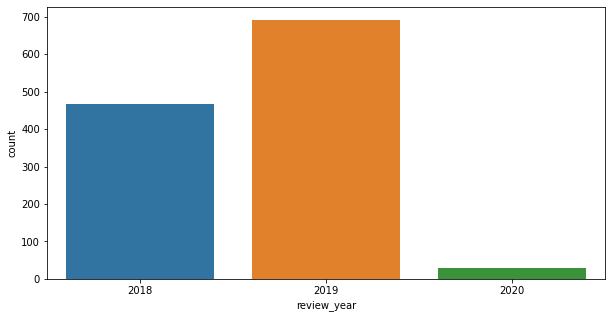

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(reviews["review_year"])

**Maximum number of reviews have been written in 2019.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


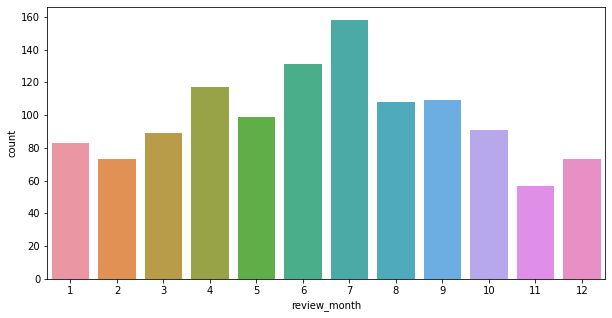

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(reviews["review_month"])

**Across all three years maximum number of reviews have been written in the month of July.**
 
 **Increased number of reviews could imply increased number of purchases.If this assumption is true then it can be concluded that there is an increase in the number of purchases/customers from April to July.**

In [45]:
# Word cloud for Good, Bad and Neutral reviews

#Creating separate data frames for Good, bad and neutral reviews

#Good reviews
condition_one = reviews["review_type"] == "Very good"
condition_two = reviews["review_type"] == "Good"

Good = reviews[condition_one | condition_two]

In [46]:
#Neutral reviews

condition=reviews["review_type"] == "neutral"

Neutral=reviews[condition]

In [47]:
#Bad reviews

condition_1 = reviews["review_type"] == "Very Bad"
condition_2 = reviews["review_type"] == "Bad"

Bad = reviews[condition_1 | condition_2]

In [48]:
# Function to create a word cloud of 300 words

stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words=300,
        max_font_size=40,
        scale=3,
        random_state=1 ).generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.subtitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()

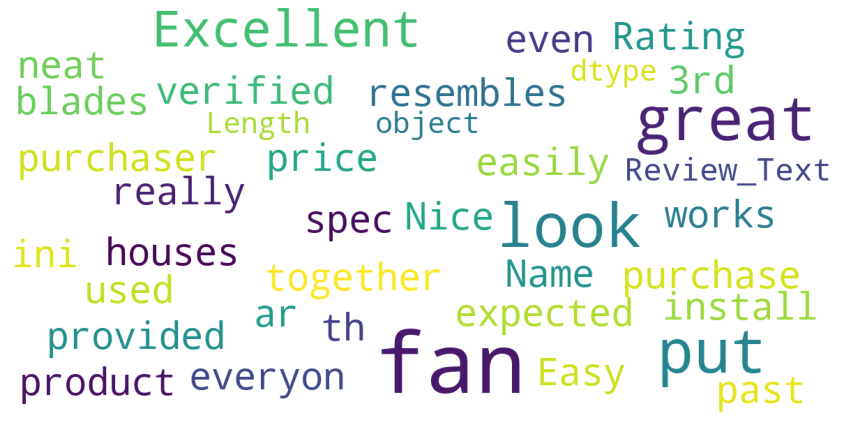

In [49]:
#Word cloud for Good reviews

show_wordcloud(Good['Review_Text']) 

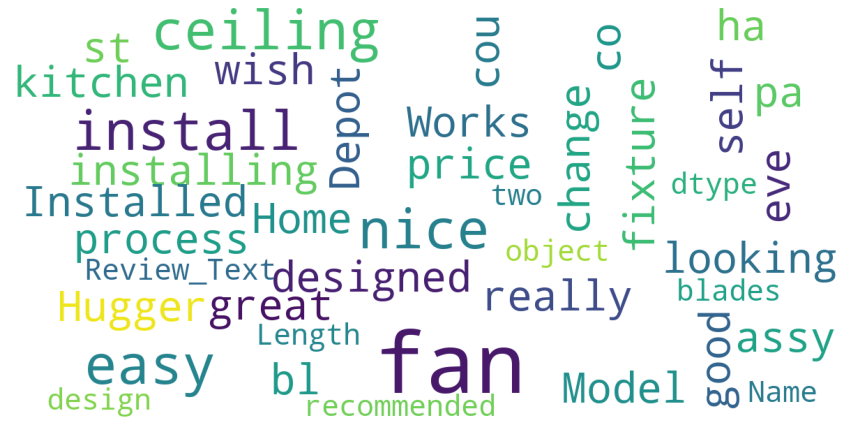

In [50]:
# Word cloud for Neutral reviews

show_wordcloud(Neutral['Review_Text'])

**The above wordclouds for Good and Neutral reviews refelect that customers are satisfied with certain features of the ceiling fans that they have purchased.**

**Words like,**
* **'price' could indicate that customers are satisfied with the price at which the product was offered.**
* **'expected' could indicate that the purchased product looks/functions as expected by the customer.**
* **'easy' could indicate that the products are easy to install/use.**

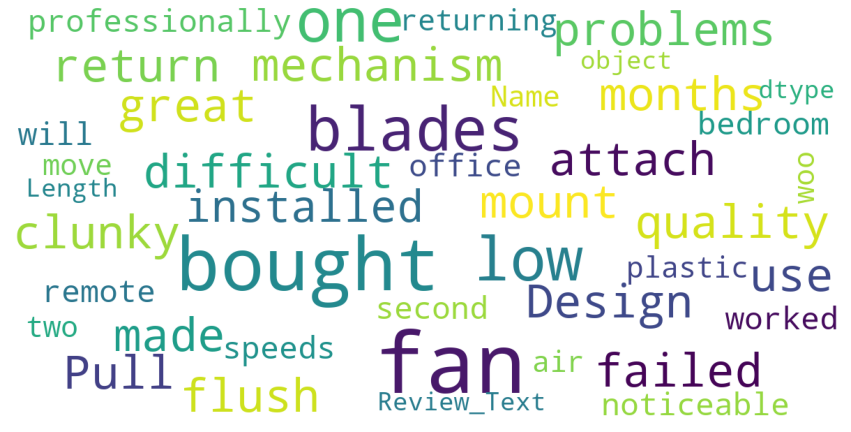

In [51]:
show_wordcloud(Bad['Review_Text'])

**The above wordcloud for Bad reviews refelect some features that customers are dissatisfied with.**

**Words like,**
* **'blades'(which is very evident and large in size in the wordcloud) could indicate that most customers are facing issues with the fan blades.**

* **'quality' could indicate that customers have complaints with respect to the product quality.**

* **'return' could indicate that customers wish to return the product that they have purchased or that they have a complaint with respect to the return policy of the e-commerce site.**

In [52]:
# Wordcloud for 'Kichler' - The brand with the least number of reviews and the lowest avearge rating

# Subsetting all 'Kichler' reviews

condition_k=reviews["Brand"] == "Kichler"

Kichler=reviews[condition_k]
Kichler.shape

(28, 18)

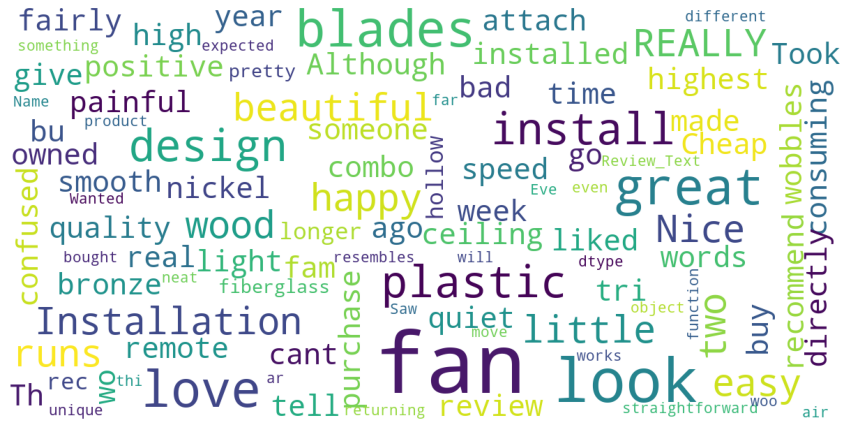

In [ ]:
show_wordcloud(Kichler['Review_Text'])

**Above wordcloud reflects some features of kichler fans that customers were possibly dissatisfied with.**

**Words like,**

* **'blades' could mean the customers are dissatisfied with the kind of blades the brand offers**

* **'Installation' and 'painful' could mean that the customers find the installation of kichler fans time consuming or difficult**

* **'wobbles' could indicate that the fan wobbles**

In [53]:
# Has Kichler been the least popular brand across all years?

Kichler.groupby('review_year')['Review_Rating_Score'].agg(['mean','count']).sort_values(by='count',ascending=False)

,mean,count
review_year,,
2019,3.625,16
2018,4.250,12


**Clearly Kichler has been reviewed/Purchased by very few customers across two years and there is not even a single review for it in the year 2020.**

In [54]:
# Exploring review length

#The longest review

reviews['review_length'].max()

3329

In [55]:
#The shortest review

reviews['review_length'].min()

10

**The longest review is 3329 words long and the shortest review is 10 words long.**

In [56]:
#Average review length

reviews['review_length'].mean()

209.80387205387206

**On an average a review is 210 words long.**

In [57]:
# Is there a relationship between review length and rating?

#Creating a separate data frame of the two required columns
subset=reviews[["Review_Rating_Score","review_length"]]
subset.head()


,Review_Rating_Score,review_length
0,5,36
1,5,137
2,5,39
3,5,109
4,5,62


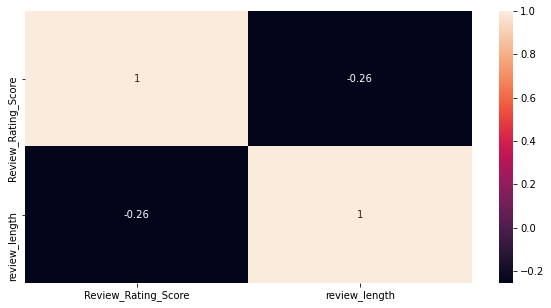

In [58]:
plt.figure(figsize=(10, 5))
sns.heatmap(subset.corr(), annot=True)

**There is a negative correlation between the length of a review and the rating. This means as the length of a review increases the rating decreases or longer the review lesser the rating.This indicates that when customers are not happy with their purchase they tend to write longer reviews to describe their experience. On the other hand when they are satisfied with their purchase they tend to write shorter reviews.**

# **Suggesting some ideas based on the gathered inferences**

* Customers are price sensitive. Hence offers related to price can encourage customers to purchase a ceiling fan. Discounts that are being offered on a product can be highlighted so its immediately visible to a customer when he/she is scrolling through different ceiling fans. Tags/stickers like 'price drop' can be attached with product images and emails informing customers regarding the price drop can be sent to them, a separate section by name 'the discount store' can be created on the website. Since the customers are price sensitive, any offer related to price will seem attractive to them and hence encourage them to make a purchase.

* Tags like 'Most popular', 'Highly rated' , 'Most popular at Lowes' ,'Most popular at HomeDepot' can be attached with product images that have been purchased by many customers and have a high average rating as well (top 5 products by average ratings in the above outputs).

* Similarly, tags like 'popular brands' should be attached to brands like Harbor breeze and other top 5 brands and they should pop up first when a customer browses for ceiling fans on the website.

* 'Return' in an evident word in the 'Bad reviews' wordcloud. This could mean that either customers want to return the product or they are not happy with the return policy of the e-commerce website. If the return policy is the issue then, specific issues related to it can be found out and the return policy can be improved and made more convinient in order to enhance customer satisfaction.

* As an e-commerce website it is important to list good brands.If customers constantly have complaints with respect to a particular brand,especially with the quality of it(like Kichler in this data set) then such brands should not be listed on the website else a negative impression of the e-commerce website will be formed among the customers stating that this particular website does not have good brands listed under it and this ultimately damages the e-commerce website's brand image.

* There are some common brands across both retailers, Homedepot and Lowes such as 'Hunter'. Say a customer clicks on a particular ceiling fan from Hunter offered by Lowes, on the same page a pop up or recommendation stating 'this product is also offered by one other retailer - Homedepot' should come up so that the customer can compare across different retailers and choose the best one based on number of purchases, ratings or price. This way the customer need not spend extra effort in seraching for another retailer who is offering the same product to compare and comparison becomes convinient which ultimately enhances the user experience on the ecommerce website.

## **Sentiment analysis - Analyzing customer sentiments and building a predictive model for sentiment prediction**

In [68]:
# Creating a separte dataframe with only 2 columns - 'Review_Text' and 'Review_Rating_Score' since the further pre-processing and sentiment analysis will be based only on these columns

senti_data=reviews[['Review_Text','Review_Rating_Score']]
senti_data.head()

,Review_Text,Review_Rating_Score
0,Excellent fan for an excellent price,5
1,I put these fans in my spec houses and everyon...,5
2,Rating provided by a verified purchaser,5
3,"Easy to put together, our 3rd purchase for th...",5
4,This fan it was easily to install and it is a ...,5


**Cleaning the Review_Text column**

In [69]:
# Converting all charaters from each row in the dataframe to lower case using the apply function 
# Conversion to lower case is so that 2 same words are not considered as different just because they are in different cases(1 in upper case and 1 in lower case)

senti_data['Cleaned_reviewText']=senti_data['Review_Text'].apply(lambda l:" ".join(l.lower() for l in l.split()))
senti_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Review_Text,Review_Rating_Score,Cleaned_reviewText
0,Excellent fan for an excellent price,5,excellent fan for an excellent price
1,I put these fans in my spec houses and everyon...,5,i put these fans in my spec houses and everyon...
2,Rating provided by a verified purchaser,5,rating provided by a verified purchaser
3,"Easy to put together, our 3rd purchase for th...",5,"easy to put together, our 3rd purchase for thi..."
4,This fan it was easily to install and it is a ...,5,this fan it was easily to install and it is a ...


In [70]:
# Removing extra whitespace 

senti_data['Cleaned_reviewText']=senti_data['Cleaned_reviewText'].str.strip()
senti_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Review_Text,Review_Rating_Score,Cleaned_reviewText
0,Excellent fan for an excellent price,5,excellent fan for an excellent price
1,I put these fans in my spec houses and everyon...,5,i put these fans in my spec houses and everyon...
2,Rating provided by a verified purchaser,5,rating provided by a verified purchaser
3,"Easy to put together, our 3rd purchase for th...",5,"easy to put together, our 3rd purchase for thi..."
4,This fan it was easily to install and it is a ...,5,this fan it was easily to install and it is a ...


In [71]:
# Removing punctuations and symbols so that only text data remains

senti_data['Cleaned_reviewText']=senti_data['Cleaned_reviewText'].str.replace('[^\w\s]','')
senti_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Review_Text,Review_Rating_Score,Cleaned_reviewText
0,Excellent fan for an excellent price,5,excellent fan for an excellent price
1,I put these fans in my spec houses and everyon...,5,i put these fans in my spec houses and everyon...
2,Rating provided by a verified purchaser,5,rating provided by a verified purchaser
3,"Easy to put together, our 3rd purchase for th...",5,easy to put together our 3rd purchase for this...
4,This fan it was easily to install and it is a ...,5,this fan it was easily to install and it is a ...


In [72]:
# Removing stopwords from each row in the dataframe using the apply function since stopwords dont contribute in understanding/detecting the sentiment of a review

st_words=stopwords.words('english')
senti_data['Cleaned_reviewText']=senti_data['Cleaned_reviewText'].apply(lambda s: " ".join(s for s in s.split() if s not in st_words))
senti_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Review_Text,Review_Rating_Score,Cleaned_reviewText
0,Excellent fan for an excellent price,5,excellent fan excellent price
1,I put these fans in my spec houses and everyon...,5,put fans spec houses everyone likes like price...
2,Rating provided by a verified purchaser,5,rating provided verified purchaser
3,"Easy to put together, our 3rd purchase for th...",5,easy put together 3rd purchase brand 3 rooms f...
4,This fan it was easily to install and it is a ...,5,fan easily install beautiful model


In [73]:
# Removing numbers so that only text data remains

senti_data['Cleaned_reviewText'] = senti_data['Cleaned_reviewText'].str.replace('\d+', '')
senti_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Review_Text,Review_Rating_Score,Cleaned_reviewText
0,Excellent fan for an excellent price,5,excellent fan excellent price
1,I put these fans in my spec houses and everyon...,5,put fans spec houses everyone likes like price...
2,Rating provided by a verified purchaser,5,rating provided verified purchaser
3,"Easy to put together, our 3rd purchase for th...",5,easy put together rd purchase brand rooms fan...
4,This fan it was easily to install and it is a ...,5,fan easily install beautiful model


In [74]:
# Tokenization - dividing the text string into individual words

senti_data['Cleaned_reviewText'] = senti_data.apply(lambda t: nltk.word_tokenize(t['Cleaned_reviewText']),axis=1)
senti_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Review_Text,Review_Rating_Score,Cleaned_reviewText
0,Excellent fan for an excellent price,5,"[excellent, fan, excellent, price]"
1,I put these fans in my spec houses and everyon...,5,"[put, fans, spec, houses, everyone, likes, lik..."
2,Rating provided by a verified purchaser,5,"[rating, provided, verified, purchaser]"
3,"Easy to put together, our 3rd purchase for th...",5,"[easy, put, together, rd, purchase, brand, roo..."
4,This fan it was easily to install and it is a ...,5,"[fan, easily, install, beautiful, model]"


In [75]:
# Lemmatization - fetching the root word of each token

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(l,'v')for l in tokens]


In [76]:
senti_data['Cleaned_reviewText']=senti_data['Cleaned_reviewText'].apply(lemmatize)
senti_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Review_Text,Review_Rating_Score,Cleaned_reviewText
0,Excellent fan for an excellent price,5,"[excellent, fan, excellent, price]"
1,I put these fans in my spec houses and everyon...,5,"[put, fan, spec, house, everyone, like, like, ..."
2,Rating provided by a verified purchaser,5,"[rat, provide, verify, purchaser]"
3,"Easy to put together, our 3rd purchase for th...",5,"[easy, put, together, rd, purchase, brand, roo..."
4,This fan it was easily to install and it is a ...,5,"[fan, easily, install, beautiful, model]"


In [77]:
# Replacing the ratings with sentiments
# 1,2 = Negative ; 3 = Neutral ; 4,5 = Positive

senti_data['sentiment'] = senti_data['Review_Rating_Score'].map({1:'negative', 2:'negative',3:'neutral',4:'positive',5:'positive'})
senti_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Review_Text,Review_Rating_Score,Cleaned_reviewText,sentiment
0,Excellent fan for an excellent price,5,"[excellent, fan, excellent, price]",positive
1,I put these fans in my spec houses and everyon...,5,"[put, fan, spec, house, everyone, like, like, ...",positive
2,Rating provided by a verified purchaser,5,"[rat, provide, verify, purchaser]",positive
3,"Easy to put together, our 3rd purchase for th...",5,"[easy, put, together, rd, purchase, brand, roo...",positive
4,This fan it was easily to install and it is a ...,5,"[fan, easily, install, beautiful, model]",positive


In [78]:
# Converting the cleaned column from list to pandas series

senti_data['Cleaned_reviewText']=senti_data['Cleaned_reviewText'].apply(lambda u: " ".join([l for l in u]))
senti_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Review_Text,Review_Rating_Score,Cleaned_reviewText,sentiment
0,Excellent fan for an excellent price,5,excellent fan excellent price,positive
1,I put these fans in my spec houses and everyon...,5,put fan spec house everyone like like price va...,positive
2,Rating provided by a verified purchaser,5,rat provide verify purchaser,positive
3,"Easy to put together, our 3rd purchase for th...",5,easy put together rd purchase brand room fan love,positive
4,This fan it was easily to install and it is a ...,5,fan easily install beautiful model,positive


**Creating a document term matrix out of the Cleaned_reviewText column using TF-IDF vectorization**


In [79]:
# Creating a document term matrix using TF-IDF vectorization with default ngram range,unigrams (one word)

tfidf = TfidfVectorizer()
Dtm_uni = tfidf.fit_transform(senti_data['Cleaned_reviewText'])

In [80]:
# Converting the document term matrix into a data frame and assigning column names from the tfidf vectorizer

Dtm_uni = Dtm_uni.toarray()
Dtm_uni_df=pd.DataFrame(Dtm_uni, columns = tfidf.get_feature_names())

In [81]:
Dtm_uni_df.shape

#The data frame has 1188 rows and 2711 columns (each word from the Cleaned_reviewText as one column)

(1188, 2711)

In [82]:
# Attaching the target variable ('sentiment') to the document term matrix

dtm_with_target = pd.concat([Dtm_uni_df,senti_data['sentiment'] ], axis=1)
dtm_with_target.head()

,aa,aaa,ab,ability,able,abs,absolutely,abstract,ac,accent,accept,acceptable,accessible,accessories,accidentally,accommodate,accord,accuracy,accurate,ache,achieve,activation,actual,actually,ad,adapt,add,addition,additional,addon,address,adequate,adjust,adjustable,adjustment,adjustments,admire,advantage,advertise,advertisement,...,worry,worse,worst,worth,would,wouldnt,wouldntim,wow,wrench,write,wrong,wrongfinally,wscrews,xmas,xx,yaritza,yay,yeah,year,yeari,years,yellow,yellowish,yes,yesi,yesterday,yet,yield,yo,yoga,youd,youll,youmine,youre,youtube,youve,yr,yrs,zero,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive


In [83]:
dtm_with_target.shape

(1188, 2712)

**Separating the independent and dependent variables**

In [84]:
# Independent variables - words

ind_vars = dtm_with_target.drop(columns=['sentiment'])
ind_vars.shape 

(1188, 2711)

In [85]:
# Dependent variable - sentiment

dep_var=dtm_with_target['sentiment']
dep_var.shape

(1188,)

**Splitting the data sets into train and test set in a 70:30 ratio**

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(ind_vars,dep_var,test_size=0.3,random_state=1)

In [87]:
X_train.shape , X_test.shape

((831, 2711), (357, 2711))

**The training data has 831 observations and the test data has 357 observations.**

**Model Building - Using the Multinomial Naive Bayes algorithm for sentiment prediction**

In [88]:
# Building the Multinomial Naive Bayes model on the train data

Multinomial_NB = MultinomialNB()
Multinomial_NB.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [89]:
# Predicting the model on the train data

pred_mnb_train = Multinomial_NB.predict(X_train)

In [90]:
# Model performance metrics for the train data

Accuracy_train=accuracy_score(Y_train, pred_mnb_train)
Precision_train=precision_score(Y_train, pred_mnb_train,average='macro')
Recall_train=recall_score(Y_train, pred_mnb_train,average='macro')
F1score_train=f1_score(Y_train, pred_mnb_train,average='macro')

results_train = pd.DataFrame([['Multinomial Naive Bayes on train data', Accuracy_train,Precision_train ,Recall_train,F1score_train]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
# Predicting the model on test data

pred_mnb_test=Multinomial_NB.predict(X_test)

In [92]:
# Model performance metrics for the test data

Accuracy_test=accuracy_score(Y_test, pred_mnb_test)
Precision_test=precision_score(Y_test, pred_mnb_test,average='macro')
Recall_test=recall_score(Y_test, pred_mnb_test,average='macro')
F1score_test=f1_score(Y_test, pred_mnb_test,average='macro')

results_test = pd.DataFrame([['Multinomial Naive Bayes on test data', Accuracy_test,Precision_test ,Recall_test,F1score_test]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
# Variance in model performance metrics - Train Vs test

Accuracy_variance =(Accuracy_train-Accuracy_test)
Precision_variance=(Precision_train-Precision_test)
Recall_variance=(Recall_train-Recall_test)
F1score_variance=(F1score_train-F1score_test)

Variance = pd.DataFrame([[Accuracy_variance,Precision_variance ,Recall_variance,F1score_variance]],
               columns = ['Accuracy_variance', 'Precision_variance', 'Recall_variance', 'F1 Score_variance'])

In [94]:
results_train

,Model,Accuracy,Precision,Recall,F1 Score
0,Multinomial Naive Bayes on train data,0.807461,0.602332,0.33913,0.309126


In [95]:
results_test

,Model,Accuracy,Precision,Recall,F1 Score
0,Multinomial Naive Bayes on test data,0.848739,0.282913,0.333333,0.306061


In [96]:
Variance

,Accuracy_variance,Precision_variance,Recall_variance,F1 Score_variance
0,-0.041279,0.319419,0.005797,0.003066


**Since there are more positive reviews in the data set when compared to negative and neutral the data set is imbalanced in nature. Hence looking at the accuracy would not be right and the f1 score should be looked at instead. Though the f1 score is not very high it is consistent across both the train and the test data. The variance between the f1 score of the train data and the f1 score of the test data is < 5% and hence it can be concluded that the model is consistent or stable.** 